In [6]:
import numpy as np
import gym
import math
import torch as T
import random
from sac_trader import SAC_Trader
from sac_trader2 import SAC_Trader2
from sac_agent import SAC_Agent
import time

In [7]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 2000

dt = 1/ N_prices # time step

In [8]:
agent = SAC_Agent([2])

trader = SAC_Trader2(sigma, A, k, dt, agent)

train_start = time.time()
epochs_start = time.time()

epoch_num = 3

train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    bid = np.empty(shape=1)  # ask quoted by strategy
    ask = np.empty(shape=1)  # bid quoted by str.
    
    s = np.zeros(N_prices)
    s[0] = s0
    W = np.random.normal(0, np.sqrt(dt), N_prices)
    for i in range(1, N_prices):
        ds = sigma * W[i-1]
        s[i] = s[i-1] + ds

    # simulation loop, training logic is inside get_quotes
    for i in range(N_prices):
        Bid, Ask = trader.get_bid_ask(1 - i*dt, s[i], trainMode=True)
        # print("s: ", s[i], "Bid: ", Bid, "Ask: ", Ask)
        trader.interact_with_market(Bid, Ask, s[i])

        print()


    # save cumulative reward for epoch
    train_rewards[epoch] = trader.reward_total

    print(train_rewards[epoch])

    # finish training epoch
    trader.reset()


explore:  True
counter:  0 memory_size:  1000
s:  100.0 inventory:  0 sigma:  2 action:  [0.26318897] risk:  0.6315944869421856 timeleft:  1.0 res_price:  100.0
spread 3.6391336296082835
Bid, Ask:  (98.18043318519585, 101.81956681480415)
0

here
explore:  True
counter:  1 memory_size:  1000
s:  99.97983804089915 inventory:  0 sigma:  2 action:  [0.36684772] risk:  0.6834238615246546 timeleft:  0.9995 res_price:  99.97983804089915
spread 3.8309999689288174
Bid, Ask:  (98.06433805643475, 101.89533802536356)
0.0

here
explore:  True
counter:  2 memory_size:  1000
s:  100.05322225483272 inventory:  0 sigma:  2 action:  [0.57110191] risk:  0.7855509528486488 timeleft:  0.999 res_price:  100.05322225483272
spread 4.211282328256109
Bid, Ask:  (97.94758109070466, 102.15886341896078)
0.0

here
explore:  True
counter:  3 memory_size:  1000
s:  100.08710535245467 inventory:  0 sigma:  2 action:  [0.02615829] risk:  0.5130791473146804 timeleft:  0.9985 res_price:  100.08710535245467
spread 3.19604

In [11]:
train_rewards

array([34.25706907])

AttributeError: type object 'SAC_Trader' has no attribute 'Ask'

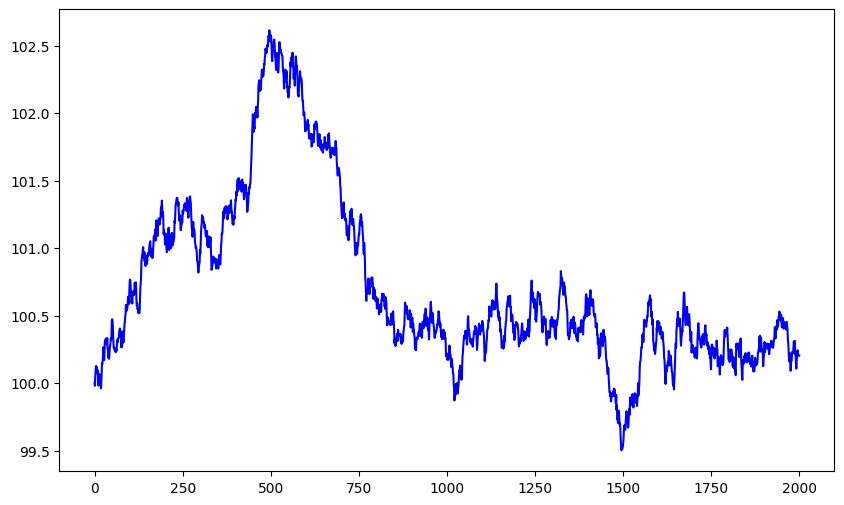

In [10]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))

# Plot s in blue
plt.plot(s, label='s', color='blue')

# Plot SAC_Trader.Ask in green
plt.plot(SAC_Trader.Ask, label='SAC_Trader.Ask', color='green')

# Plot SAC_Trader.Bid in red
plt.plot(SAC_Trader.Bid, label='SAC_Trader.Bid', color='red')

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Plot of s, SAC_Trader.Ask, and SAC_Trader.Bid')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
cumulative_reward = np.cumsum(SAC_Trader.reward)


# Plot the data
plt.figure(figsize=(10, 6))

# Plot cumulative reward in purple (choose your color)
# plt.plot(SAC_Trader.inventory, label='Cumulative Reward', color='purple')
plt.plot(SAC_Trader.reward, label='Reward', color='blue')

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Reward Values')
plt.title('Plot of Rewards')
plt.legend()

# Show the plot
plt.show()
